In [1]:
import pandas as pd

df = pd.read_csv("student_stress.csv")
df.head()


,sleep_hours,study_hours,academic_pressure,peer_pressure,financial_stress,physical_activity,diet_quality,screen_time,attendance,social_support,stress_level
0,7.096057,5.599033,6,4,4,2.137476,3,9.036155,95.425416,2,Medium
1,6.334083,4.886951,3,10,6,4.089343,5,5.461074,89.631621,1,High
2,7.277226,3.589446,8,5,8,1.371664,1,4.106105,71.185673,7,High
3,8.327636,2.529595,3,5,3,1.899690,2,5.674726,87.208977,2,Low
4,6.219016,4.547335,2,6,1,1.969560,3,4.142650,73.489753,1,Low


In [3]:
import os
os.listdir()


['.ipynb_checkpoints', 'student_stress_analysis.ipynb']

In [2]:
df.shape


(1000, 11)

In [3]:
df.columns


Index(['sleep_hours', 'study_hours', 'academic_pressure', 'peer_pressure',
       'financial_stress', 'physical_activity', 'diet_quality', 'screen_time',
       'attendance', 'social_support', 'stress_level'],
      dtype='object')

In [4]:
df.describe

<bound method NDFrame.describe of      sleep_hours  study_hours  academic_pressure  peer_pressure  \
0       7.096057     5.599033                  6              4   
1       6.334083     4.886951                  3             10   
2       7.277226     3.589446                  8              5   
3       8.327636     2.529595                  3              5   
4       6.219016     4.547335                  2              6   
..           ...          ...                ...            ...   
995     6.162680     5.105225                  1             10   
996     8.657224     3.460218                  7              5   
997     7.269011     2.177188                  3              1   
998     5.814585     3.255400                  5              1   
999     7.187099     2.382646                 10              2   

     financial_stress  physical_activity  diet_quality  screen_time  \
0                   4           2.137476             3     9.036155   
1                  

In [5]:
df.isnull().sum()


sleep_hours          0
study_hours          0
academic_pressure    0
peer_pressure        0
financial_stress     0
physical_activity    0
diet_quality         0
screen_time          0
attendance           0
social_support       0
stress_level         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt


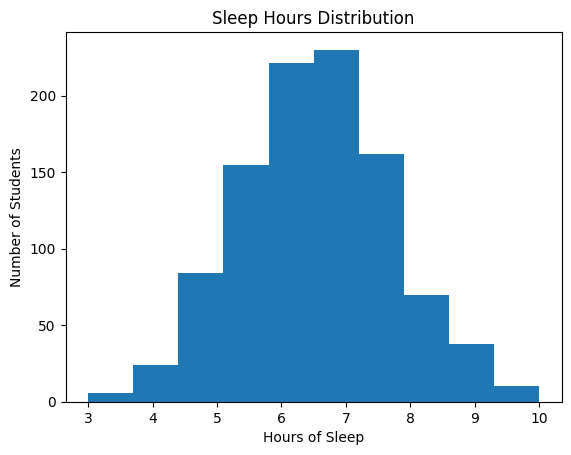

In [7]:
plt.hist(df["sleep_hours"])
plt.title("Sleep Hours Distribution")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Students")
plt.show()


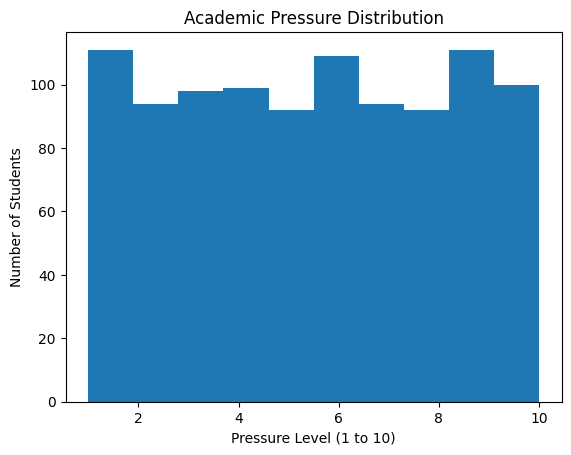

In [8]:
plt.hist(df["academic_pressure"])
plt.title("Academic Pressure Distribution")
plt.xlabel("Pressure Level (1 to 10)")
plt.ylabel("Number of Students")
plt.show()


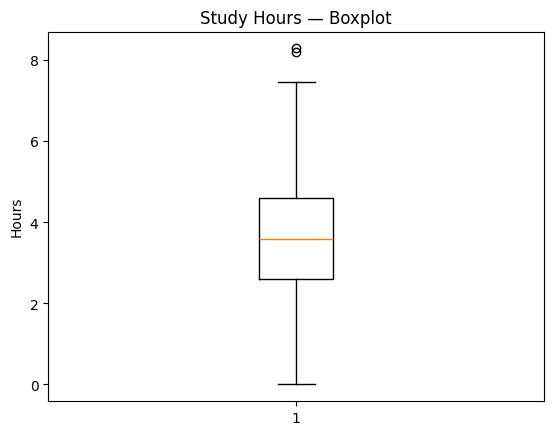

In [9]:
plt.boxplot(df["study_hours"])
plt.title("Study Hours — Boxplot")
plt.ylabel("Hours")
plt.show()


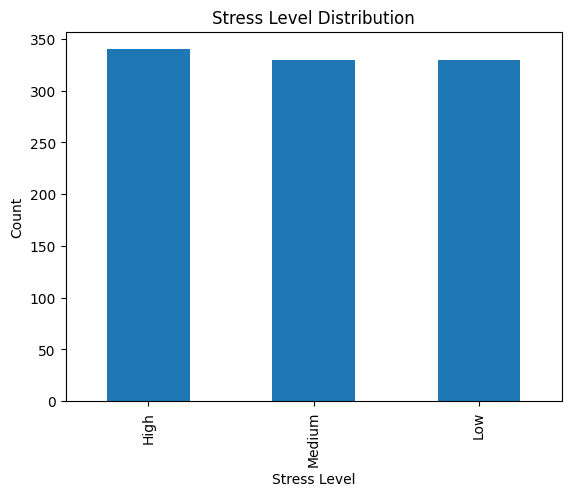

In [10]:
df["stress_level"].value_counts().plot(kind="bar")
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


In [13]:
X = df.drop(columns=["stress_level"])   # input features
y = df["stress_level"]                  # target output


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded[:10]   # show first 10 encoded values


array([2, 0, 0, 1, 1, 2, 2, 1, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [15]:
X_train.shape, X_test.shape


((800, 10), (200, 10))

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) build a pipeline: scale -> classifier
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, multi_class="ovr", random_state=42))
])

# 2) train on training data only
logreg_pipe.fit(X_train, y_train)

# 3) predict on the held-out test set (data the model never saw during training)
y_pred_lr = logreg_pipe.predict(X_test)

# 4) get accuracy (simple % correct)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression — Accuracy:", acc_lr)

# 5) detailed per-class metrics
print("\nPer-class metrics (precision/recall/F1):")
print(classification_report(y_test, y_pred_lr, target_names=list(sorted(set(df['stress_level'])))))

# 6) confusion matrix: rows = true, cols = predicted
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix (LR):\n", cm_lr)


Logistic Regression — Accuracy: 0.945

Per-class metrics (precision/recall/F1):
              precision    recall  f1-score   support

        High       0.88      1.00      0.94        68
         Low       0.97      1.00      0.99        66
      Medium       1.00      0.83      0.91        66

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200


Confusion Matrix (LR):
 [[68  0  0]
 [ 0 66  0]
 [ 9  2 55]]


C:\Users\NOORJAHAN NITHYA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
# predicted probabilities for each class in the encoded order
y_proba_lr = logreg_pipe.predict_proba(X_test)
y_proba_lr[:3]  # peek first 3 rows


array([[7.49159718e-01, 3.14412993e-05, 2.50808840e-01],
       [2.62000596e-01, 9.70650362e-03, 7.28292900e-01],
       [1.01330226e-05, 7.75510709e-01, 2.24479158e-01]])

In [18]:
import numpy as np

# assuming class index  ?  is the encoded value for "High"
# let's find which integer corresponds to "High"
from sklearn.preprocessing import LabelEncoder
# you already have 'le' fitted earlier
label_index_map = {cls: idx for idx, cls in enumerate(le.classes_)}
label_index_map  # check mapping like {'High':0, 'Low':1, 'Medium':2}

idx_high = label_index_map['High']
high_alert = (y_proba_lr[:, idx_high] >= 0.60).astype(int)  # 1=alert, 0=no
high_alert[:10]


array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

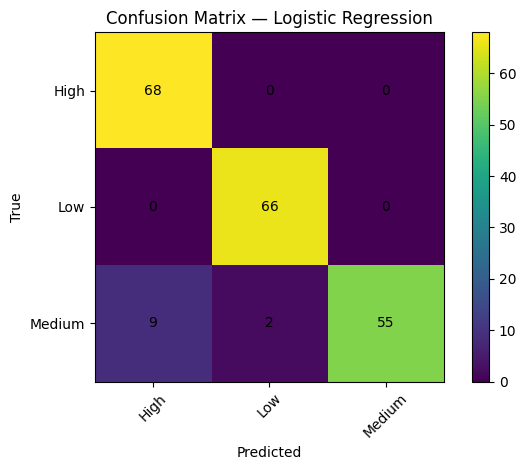

In [19]:
import matplotlib.pyplot as plt
import numpy as np

classes = list(le.classes_)  # same order as your encoder

plt.imshow(cm_lr)
plt.title("Confusion Matrix — Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("True")

# add counts on each cell
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        plt.text(j, i, cm_lr[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,      # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest — Accuracy:", acc_rf)

print("\nPer-class metrics:")
print(classification_report(y_test, y_pred_rf, target_names=list(le.classes_)))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (RF):\n", cm_rf)


Random Forest — Accuracy: 0.77

Per-class metrics:
              precision    recall  f1-score   support

        High       0.80      0.87      0.83        68
         Low       0.87      0.79      0.83        66
      Medium       0.65      0.65      0.65        66

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200


Confusion Matrix (RF):
 [[59  0  9]
 [ 0 52 14]
 [15  8 43]]


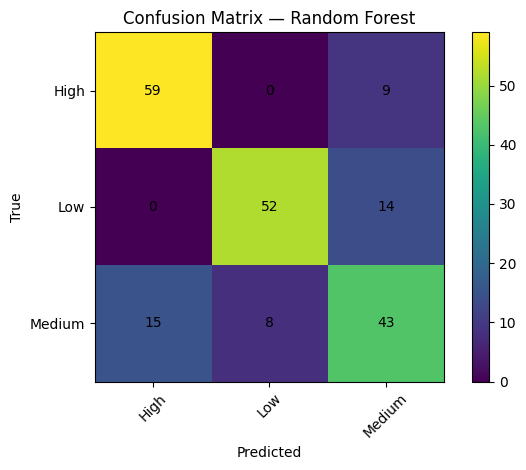

In [21]:
plt.imshow(cm_rf)
plt.title("Confusion Matrix — Random Forest")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp


academic_pressure    0.208535
financial_stress     0.152359
peer_pressure        0.112370
sleep_hours          0.096156
social_support       0.095648
screen_time          0.084455
study_hours          0.072890
physical_activity    0.069901
attendance           0.068620
diet_quality         0.039065
dtype: float64

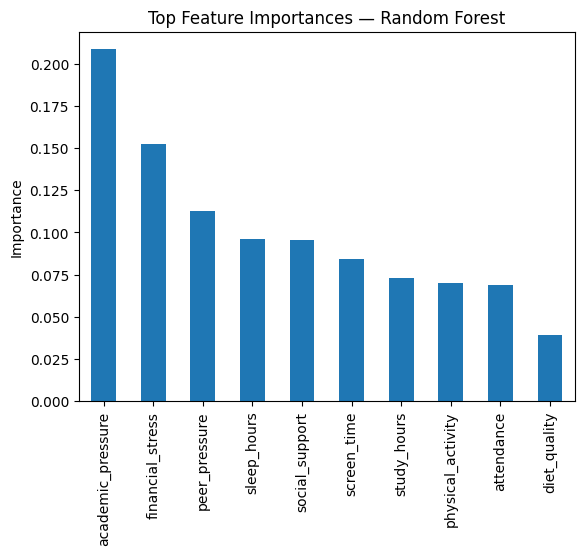

In [23]:
imp.head(12).plot(kind="bar")
plt.title("Top Feature Importances — Random Forest")
plt.ylabel("Importance")
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_lr = cross_val_score(logreg_pipe, X, le.transform(df["stress_level"]), cv=cv, scoring="f1_macro")
scores_rf = cross_val_score(rf, X, le.transform(df["stress_level"]), cv=cv, scoring="f1_macro")

print("LR 5-fold F1 (macro):", scores_lr.mean(), "+/-", scores_lr.std())
print("RF 5-fold F1 (macro):", scores_rf.mean(), "+/-", scores_rf.std())


C:\Users\NOORJAHAN NITHYA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\NOORJAHAN NITHYA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\NOORJAHAN NITHYA\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\NOORJAHAN 

LR 5-fold F1 (macro): 0.9274960824448926 +/- 0.023341368694619637
RF 5-fold F1 (macro): 0.7954056863039556 +/- 0.030045879667414524


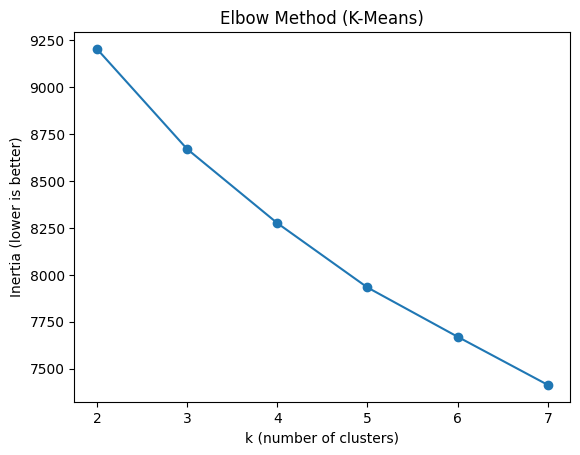

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2,8), inertias, marker='o')
plt.title("Elbow Method (K-Means)")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (lower is better)")
plt.show()


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=10)
plt.title("K-Means Clusters (k=3) via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


NameError: name 'clusters' is not defined

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


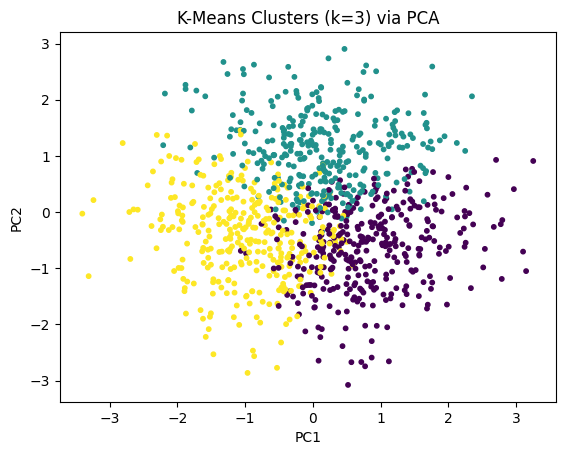

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=10)
plt.title("K-Means Clusters (k=3) via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [30]:
df_clust = df.copy()
df_clust["cluster"] = clusters

df_clust.groupby("cluster")["stress_level"].value_counts(normalize=True)


cluster  stress_level
0        High            0.365217
         Medium          0.347826
         Low             0.286957
1        High            0.518634
         Medium          0.347826
         Low             0.133540
2        Low             0.564565
         Medium          0.294294
         High            0.141141
Name: proportion, dtype: float64

In [31]:
df_clustered = df.copy()
df_clustered["cluster"] = clusters

cluster_summary = df_clustered.groupby("cluster").agg({
    "stress_level": lambda s: s.value_counts(normalize=True).to_dict(),
    "academic_pressure": "mean",
    "peer_pressure": "mean",
    "financial_stress": "mean",
    "sleep_hours": "mean",
    "study_hours": "mean",
    "screen_time": "mean",
    "physical_activity": "mean",
    "diet_quality": "mean",
    "social_support": "mean",
    "attendance": "mean"
})

cluster_summary


,stress_level,academic_pressure,peer_pressure,financial_stress,sleep_hours,study_hours,screen_time,physical_activity,diet_quality,social_support,attendance
cluster,,,,,,,,,,,
0,"{'High': 0.3652173913043478, 'Medium': 0.34782...",5.620290,4.504348,6.617391,5.818331,3.528997,5.458697,2.256991,2.518841,6.594203,79.883185
1,"{'High': 0.5186335403726708, 'Medium': 0.34782...",5.968944,7.928571,6.829193,6.919728,3.390222,5.007091,1.720949,3.537267,5.590062,87.192689
2,"{'Low': 0.5645645645645646, 'Medium': 0.294294...",4.909910,4.402402,3.189189,6.867247,3.913858,4.335797,1.904185,2.714715,4.255255,86.942484


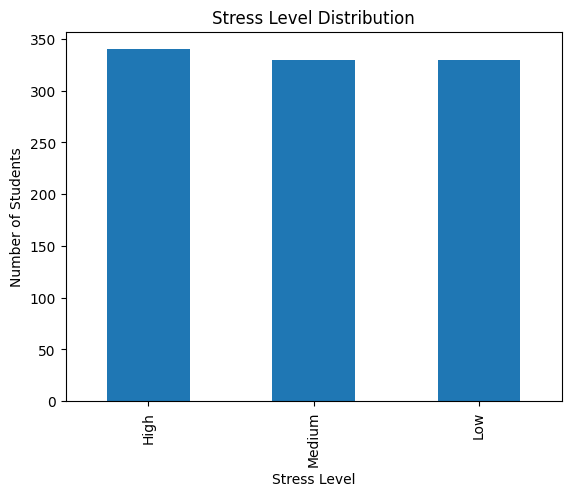

In [32]:
import matplotlib.pyplot as plt

df["stress_level"].value_counts().plot(kind="bar")

plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Number of Students")
plt.show()


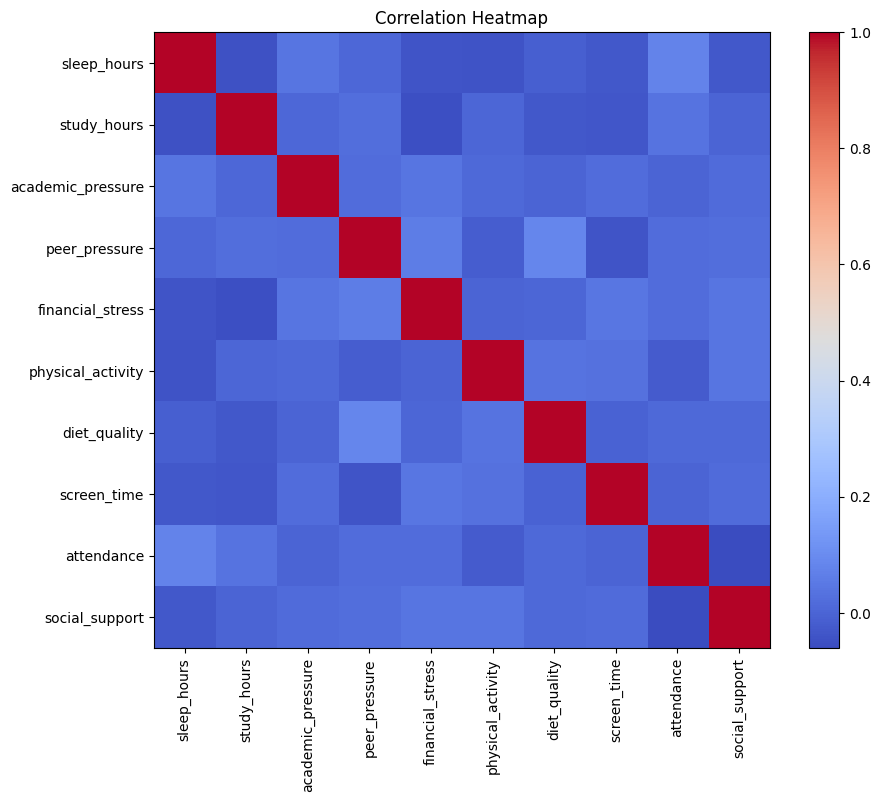

In [33]:
import numpy as np

# compute correlation matrix
corr = df.drop(columns=["stress_level"]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

# Set tick labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()


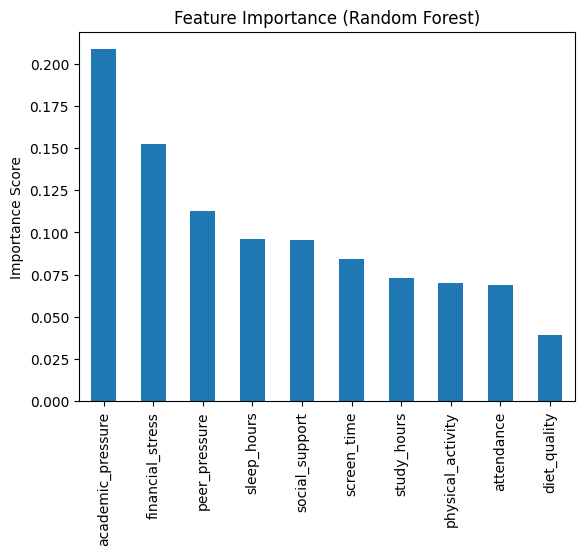

In [34]:
import pandas as pd

importance_values = rf.feature_importances_
importance_series = pd.Series(importance_values, index=X.columns).sort_values(ascending=False)

importance_series.plot(kind="bar")

plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


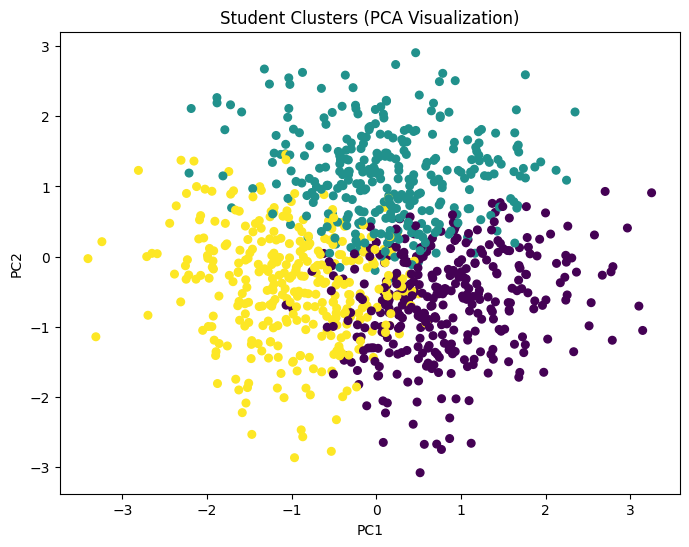

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=30)
plt.title("Student Clusters (PCA Visualization)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


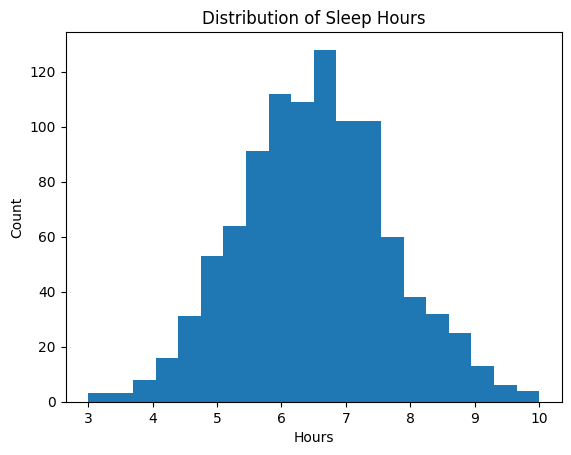

In [36]:
plt.hist(df["sleep_hours"], bins=20)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()


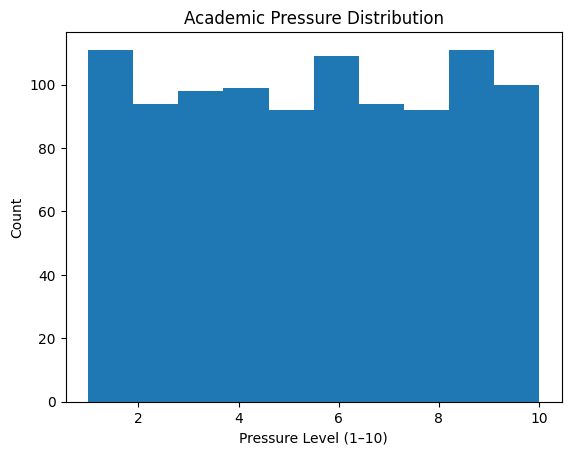

In [37]:
plt.hist(df["academic_pressure"], bins=10)
plt.title("Academic Pressure Distribution")
plt.xlabel("Pressure Level (1–10)")
plt.ylabel("Count")
plt.show()


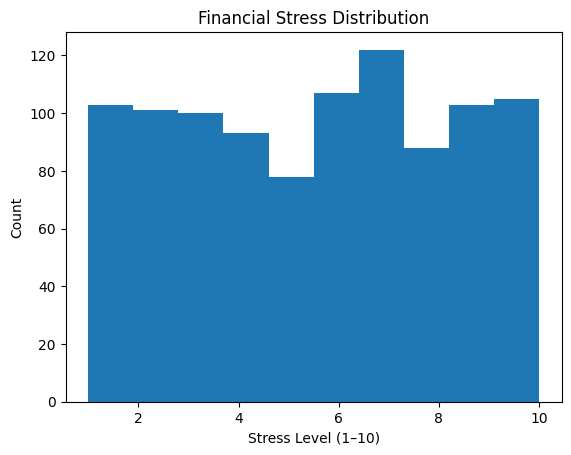

In [38]:
plt.hist(df["financial_stress"], bins=10)
plt.title("Financial Stress Distribution")
plt.xlabel("Stress Level (1–10)")
plt.ylabel("Count")
plt.show()


In [39]:
from joblib import dump
import os

os.makedirs("models", exist_ok=True)

# assuming these exist from earlier steps:
# logreg_pipe  -> your trained Pipeline(StandardScaler + LogisticRegression)
# le           -> your fitted LabelEncoder

dump(logreg_pipe, "models/logreg_pipeline.joblib")
dump(le, "models/label_encoder.joblib")

print("Saved: models/logreg_pipeline.joblib and models/label_encoder.joblib")


Saved: models/logreg_pipeline.joblib and models/label_encoder.joblib
